In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df=pd.read_csv("cyberbullying_tweets.csv")
df.head()

,tweet_text,cyberbullying_type
0,"In other words #katandandre, your food was cra...",not_cyberbullying
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47692 entries, 0 to 47691
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_text          47692 non-null  object
 1   cyberbullying_type  47692 non-null  object
dtypes: object(2)
memory usage: 745.3+ KB


In [6]:
df.isnull().sum()

tweet_text            0
cyberbullying_type    0
dtype: int64

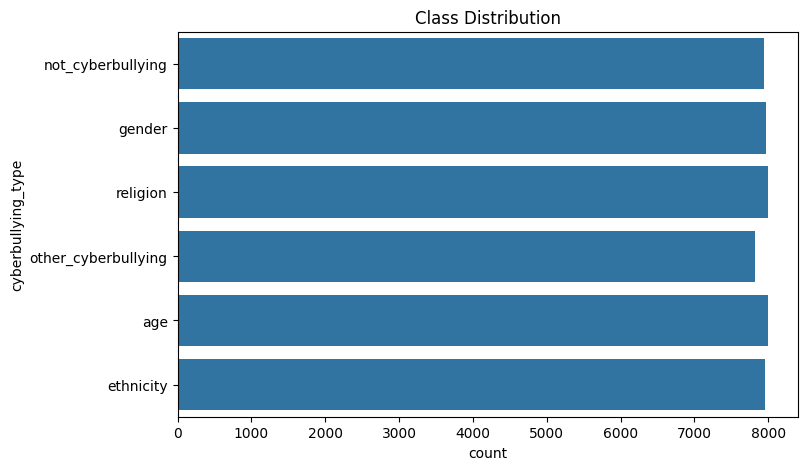

In [7]:
plt.figure(figsize=(8,5))
sns.countplot(y=df["cyberbullying_type"])
plt.title("Class Distribution")
plt.show()

In [8]:
X=df['tweet_text']
y=df['cyberbullying_type']

Label encoder

In [9]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
y_encoded=le.fit_transform(y)

In [10]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y_encoded,test_size=0.2,random_state=42)

X_test.shape , X_train.shape , y_test.shape , y_train.shape

((9539,), (38153,), (9539,), (38153,))

Text preprocessing with TF-IDF
OneHotEncoder is for categorical variables, not raw text data. For text, you should use CountVectorizer or TfidfVectorizer, not OHE or StandardScaler.

In [11]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB


model=Pipeline(steps=[
    ("tfidf",TfidfVectorizer(stop_words='english', max_features=5000)),
    ("Multinomial",MultinomialNB())
]
)

model.fit(X_train,y_train)

,steps,"[('tfidf', ...), ('Multinomial', ...)]"
,transform_input,None
,memory,None
,verbose,False
,input,'content'
,encoding,'utf-8'
,decode_error,'strict'
,strip_accents,None
,lowercase,True
,preprocessor,None
,tokenizer,None


Prediction

In [12]:
y_pred = model.predict(X_test)

In [13]:
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score


print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.7760771569346891
              precision    recall  f1-score   support

           0       0.80      0.96      0.87      1603
           1       0.88      0.90      0.89      1603
           2       0.79      0.82      0.81      1531
           3       0.66      0.45      0.53      1624
           4       0.63      0.58      0.60      1612
           5       0.84      0.96      0.90      1566

    accuracy                           0.78      9539
   macro avg       0.77      0.78      0.77      9539
weighted avg       0.76      0.78      0.76      9539



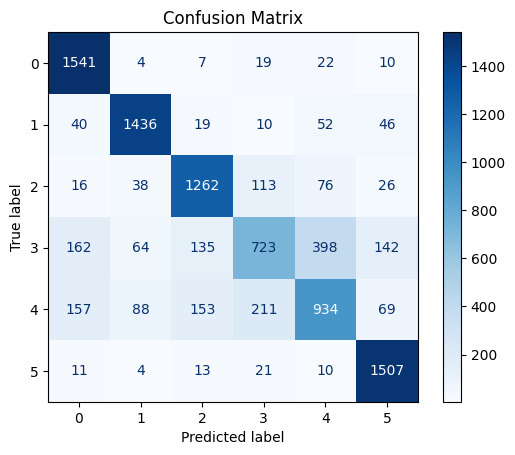

                     precision    recall  f1-score   support

                age       0.80      0.96      0.87      1603
          ethnicity       0.88      0.90      0.89      1603
             gender       0.79      0.82      0.81      1531
  not_cyberbullying       0.66      0.45      0.53      1624
other_cyberbullying       0.63      0.58      0.60      1612
           religion       0.84      0.96      0.90      1566

           accuracy                           0.78      9539
          macro avg       0.77      0.78      0.77      9539
       weighted avg       0.76      0.78      0.76      9539



In [14]:
from sklearn.metrics import ConfusionMatrixDisplay, classification_report

y_pred = model.predict(X_test)

# Confusion matrix
disp = ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, cmap='Blues')
disp.ax_.set_title("Confusion Matrix")
plt.show()

# Classification report
print(classification_report(y_test, y_pred, target_names=le.classes_))


In [15]:
df.head(3)

,tweet_text,cyberbullying_type
0,"In other words #katandandre, your food was cra...",not_cyberbullying
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying


Prediction for One Row

In [40]:


# pred=model.predict(new_app)

# print(f"Predectied clas {pred[0]}")


In [41]:
new_app=df.iloc[[3]]
pred_num = model.predict(new_app)

pred_num = int(pred_num[0])                   
print("Processed prediction (int):", pred_num)

prediction = le.inverse_transform([pred_num])[0]
print("Final decoded prediction:", prediction)

Processed prediction (int): 2
Final decoded prediction: gender


In [33]:
import pickle

with open("cyber_bullies.pkl","wb") as f:
    pickle.dump(model,f)

In [ ]:
with open("label_encode.pkl",'wb') as f:
   pickle.dump(le,f)